<a href="https://colab.research.google.com/github/sakib927/My-Data-Science/blob/main/Rice_leaf_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sakib Ali Choudhary 

This project is for constuction of a deep learning model to predict the rice leaf disease based on image recognition 

The dataset used in collected from Kaggle

The link for the dataset :- https://www.kaggle.com/datasets/dedeikhsandwisaputra/rice-leafs-disease-dataset?resource=download

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importing Models

In [47]:
from keras.models import Sequential
import tensorflow as tf
import random
import tensorflow_datasets as tfds
from keras.layers.core import Dense, Activation, Dropout, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD,RMSprop,Adam
from keras.utils import np_utils
from sklearn import metrics 
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
from google.colab.patches import cv2_imshow
import random
from numpy import *
from PIL import Image
import theano
from tqdm import tqdm 
from skimage import io

Setting the path and the image size

In [8]:
path_test = "/content/drive/MyDrive/RiceLeafsDisease"
class_names = ['bacterial_leaf_blight','brown_spot','healthy','leaf_blast','leaf_scald','narrow_brown_spot']
nb_classes = len(class_names)
image_size = (350,350)

Loading the data and labeling them

In [9]:
def load_data():
    
    datasets = ['/content/drive/MyDrive/RiceLeafsDisease']
    images = []
    labels = []

    # iterate through training and test sets
    count =0
    for dataset in datasets:

        # iterate through folders in each dataset
        for folder in os.listdir(dataset):

            if folder in ['bacterial_leaf_blight']: label = 1 
            elif folder in ['brown_spot']: label = 2 
            elif folder in ['healthy']: label = 3 
            elif folder in ['leaf_blast']: label = 4 
            elif folder in ['leaf_scald']: label = 5
            elif folder in ['narrow_brown_spot']: label = 6 
            else : print(700)

            # iterate through each image in folder
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):

                # get pathname of each image
                img_path = os.path.join(os.path.join(dataset, folder), file)

                # Open 
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                
                # resize the image
                image = cv2.resize(image, image_size)

                # Append the image and its corresponding label to the output
                images.append(image)
                labels.append(label)

    images = np.array(images, dtype = 'float32')
    labels = np.array(labels, dtype = 'int32')

    return images, labels

In [10]:
images, labels = load_data()

100%|██████████| 438/438 [00:20<00:00, 21.88it/s]


Spliting the data in training , testing , validation

In [11]:
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size = 0.2)
test_images, val_images, test_labels, val_labels = train_test_split(test_images, test_labels, test_size = 0.5)

In [12]:
n_train = train_labels.shape[0]
n_val = val_labels.shape[0]
n_test = test_labels.shape[0]

print("Number of training examples: {}".format(n_train))
print("Number of validation examples: {}".format(n_val))
print("Number of testing examples: {}".format(n_test))

print("Training images are of shape: {}".format(train_images.shape))
print("Training labels are of shape: {}".format(train_labels.shape))
print("Validation images are of shape: {}".format(val_images.shape))
print("Validation labels are of shape: {}".format(val_labels.shape))
print("Test images are of shape: {}".format(test_images.shape))
print("Test labels are of shape: {}".format(test_labels.shape))

Number of training examples: 2102
Number of validation examples: 263
Number of testing examples: 263
Training images are of shape: (2102, 350, 350, 3)
Training labels are of shape: (2102,)
Validation images are of shape: (263, 350, 350, 3)
Validation labels are of shape: (263,)
Test images are of shape: (263, 350, 350, 3)
Test labels are of shape: (263,)


Scaling the data

In [13]:
train_images = train_images / 255.0 
val_images = val_images / 255.0
test_images = test_images / 255.0

In [14]:
from keras.layers import Lambda, SeparableConv2D, BatchNormalization, Dropout, MaxPooling2D, Input, Dense, Conv2D, Activation, Flatten 
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

Building model

In [17]:
nb_epochs = 10
img_rows, img_columns = 350 ,350
img_channel = 3
nb_filters = 32
nb_pool = 2
nb_conv = 3
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation=tf.nn.relu,
                           input_shape=(350, 350, 3)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(7,  activation=tf.nn.softmax)
])

In [18]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history2  = model.fit(train_images, train_labels, epochs = nb_epochs, verbose = 1, validation_data = (test_images, test_labels))

Epoch 1/10
66/66 [==============================] - 322s 5s/step - loss: 2.7633 - accuracy: 0.4491 - val_loss: 1.5267 - val_accuracy: 0.4373
Epoch 2/10
66/66 [==============================] - 313s 5s/step - loss: 0.8950 - accuracy: 0.6765 - val_loss: 0.9539 - val_accuracy: 0.6350
Epoch 3/10
66/66 [==============================] - 307s 5s/step - loss: 0.5656 - accuracy: 0.8011 - val_loss: 0.7864 - val_accuracy: 0.7034
Epoch 4/10
66/66 [==============================] - 309s 5s/step - loss: 0.3856 - accuracy: 0.8706 - val_loss: 0.7553 - val_accuracy: 0.7452
Epoch 5/10
66/66 [==============================] - 306s 5s/step - loss: 0.1981 - accuracy: 0.9334 - val_loss: 0.8229 - val_accuracy: 0.7643
Epoch 6/10
66/66 [==============================] - 309s 5s/step - loss: 0.1016 - accuracy: 0.9705 - val_loss: 0.8937 - val_accuracy: 0.7376
Epoch 7/10
66/66 [==============================] - 313s 5s/step - loss: 0.0748 - accuracy: 0.9786 - val_loss: 0.9821 - val_accuracy: 0.7567
Epoch 8/10
66

In [19]:
score = model.evaluate(test_images, test_labels, verbose = 0 )
print("Test Score: ", score[0])
print("Test accuracy: ", score[1])

Test Score:  1.0477668046951294
Test accuracy:  0.7604562640190125


In [21]:
def plot_accuracy_loss_chart(history):
    epochs = [i for i in range(10)]
    fig , ax = plt.subplots(1,2)
    train_acc = history.history['accuracy']
    train_loss = history.history['loss']
    val_acc = history.history['val_accuracy']
    val_loss = history.history['val_loss']
    fig.set_size_inches(20,10)
    ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
    ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
    ax[0].set_title('Training & Validation Accuracy')
    ax[0].legend()
    ax[0].set_xlabel("Epochs")
    ax[0].set_ylabel("Accuracy")

    ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
    ax[1].plot(epochs , val_loss , 'r-o' , label = 'Validation Loss')
    ax[1].set_title('Training & Validation Loss')
    ax[1].legend()
    ax[1].set_xlabel("Epochs")
    ax[1].set_ylabel("Training & Validation Loss")
    plt.show()

Visualization of the training and validation loss and accuracy 

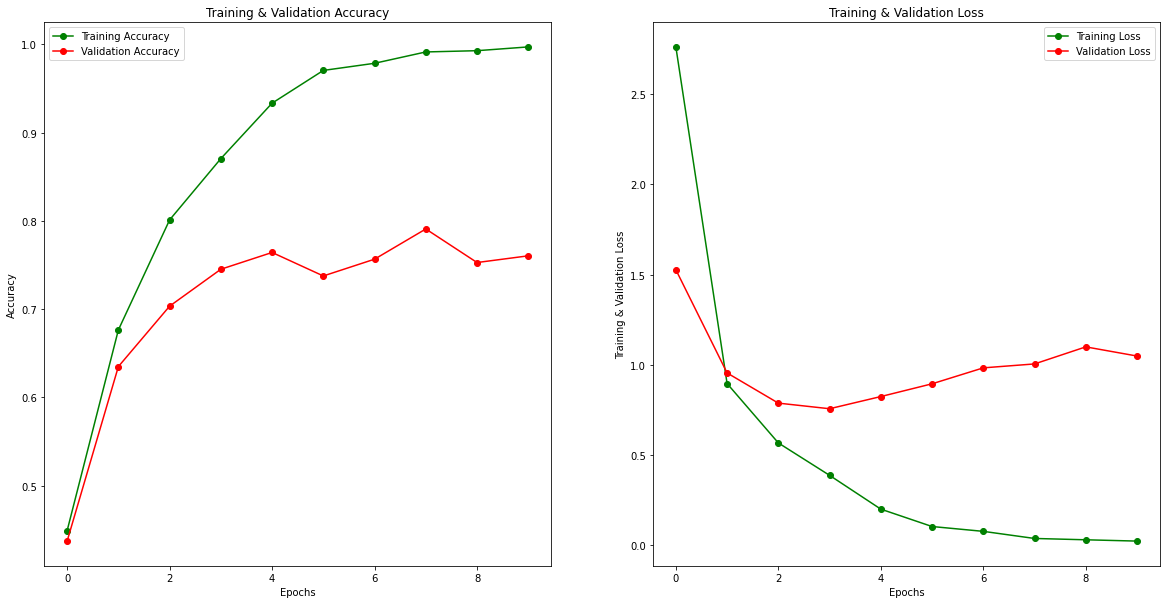

In [22]:
plot_accuracy_loss_chart(history2)

In [23]:
results = model.evaluate(test_images, test_labels)

print("Loss of the model  is - test ", results[0])
print("Accuracy of the model is - test", results[1]*100, "%")


results = model.evaluate(val_images, val_labels)

print("Loss of the model  is - val ", results[0])
print("Accuracy of the model is - val", results[1]*100, "%")

results = model.evaluate(train_images, train_labels)

print("Loss of the model  is - train ", results[0])
print("Accuracy of the model is - train", results[1]*100, "%")

9/9 [==============================] - 14s 2s/step - loss: 1.0478 - accuracy: 0.7605
Loss of the model  is - test  1.0477668046951294
Accuracy of the model is - test 76.04562640190125 %
9/9 [==============================] - 9s 1s/step - loss: 1.2577 - accuracy: 0.7757
Loss of the model  is - val  1.257664442062378
Accuracy of the model is - val 77.56654024124146 %
66/66 [==============================] - 73s 1s/step - loss: 0.0069 - accuracy: 0.9995
Loss of the model  is - train  0.006865866016596556
Accuracy of the model is - train 99.95242357254028 %


In [24]:
from sklearn.metrics import classification_report

predictions = model.predict(test_images)
predictions = np.argmax(predictions,axis=1)
predictions[:300]

array([3, 3, 1, 6, 4, 6, 1, 4, 1, 5, 1, 3, 1, 4, 4, 4, 2, 2, 2, 1, 4, 3,
       3, 3, 4, 1, 1, 1, 1, 4, 5, 6, 2, 2, 5, 4, 1, 2, 3, 5, 3, 2, 4, 3,
       6, 2, 2, 2, 3, 2, 3, 6, 4, 1, 2, 1, 3, 1, 4, 3, 2, 2, 3, 5, 6, 2,
       5, 2, 1, 6, 5, 3, 6, 6, 6, 6, 6, 6, 4, 6, 1, 4, 5, 6, 3, 2, 2, 1,
       5, 6, 1, 4, 1, 3, 3, 1, 3, 4, 3, 3, 1, 3, 3, 1, 5, 1, 4, 4, 2, 2,
       2, 4, 6, 3, 5, 5, 5, 5, 5, 2, 3, 5, 2, 5, 4, 1, 5, 1, 5, 5, 3, 3,
       1, 4, 4, 6, 5, 3, 4, 4, 4, 2, 2, 6, 3, 4, 5, 2, 5, 6, 2, 4, 6, 3,
       6, 1, 2, 4, 3, 4, 1, 2, 2, 2, 2, 3, 4, 5, 4, 3, 3, 4, 4, 3, 2, 3,
       3, 2, 4, 5, 4, 5, 3, 1, 3, 6, 1, 6, 4, 6, 6, 1, 4, 6, 4, 1, 3, 2,
       6, 6, 3, 6, 4, 2, 1, 1, 6, 6, 5, 4, 6, 3, 3, 3, 4, 5, 3, 4, 2, 5,
       1, 1, 3, 6, 5, 5, 5, 3, 6, 4, 2, 5, 6, 6, 3, 4, 2, 4, 5, 6, 5, 1,
       2, 2, 2, 4, 3, 6, 2, 4, 3, 3, 1, 3, 2, 4, 5, 2, 5, 2, 4, 2, 4])

In [25]:
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix
import pandas as pd

cm = confusion_matrix(test_labels, predictions)
cm = pd.DataFrame(cm, index = ['1', '2', '3','4','5','6'], columns = ['1', '2', '3','4','5','6'])
cm

,1,2,3,4,5,6
1,35,0,1,1,0,1
2,2,37,7,7,0,3
3,0,1,32,12,0,0
4,1,6,12,30,1,1
5,0,0,0,0,32,0
6,0,3,0,0,4,34


Constucting Confusion Matrix

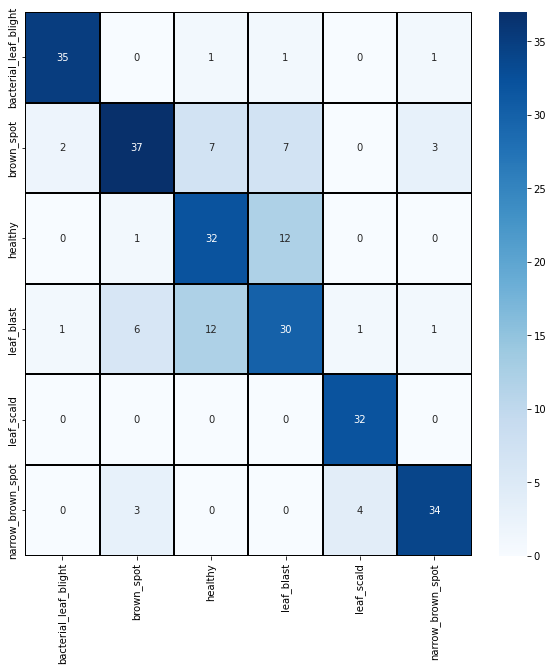

In [26]:
import seaborn as sns
def plot_confusion_matrix (cm):
    plt.figure(figsize = (10,10))
    sns.heatmap(
        cm, 
        cmap = 'Blues', 
        linecolor = 'black', 
        linewidth = 1, 
        annot = True, 
        fmt = '', 
        xticklabels = class_names, 
        yticklabels = class_names)
    
plot_confusion_matrix(cm)


Testing a random image

33


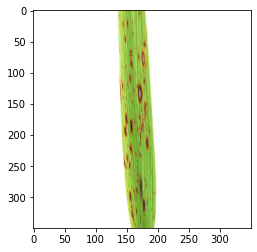

In [53]:
x = random.randint(1, 263)
print(x)
plt.imshow(np.squeeze(test_images[x]))

In [56]:
prediction=model.predict(test_images)
m = np.argmax(prediction[x])
print(m)
if m == 1 : print('bacterial_leaf_blight')
elif m == 2 : print('brown_spot') 
elif m == 3 : print('healthy')
elif m == 4 : print('leaf_blast') 
elif m == 5 : print('leaf_scald')
elif m == 6 : print('narrow_brown_spot')

2
brown_spot


The Prediction was Correct

We have archived accuracy of 76.04 % to predict the rice leaf disease using CNN